<a href="https://colab.research.google.com/github/smsidekick/tent_freeze/blob/main/ENV_617_class_4_GRAPH_GALLERY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Class 4 Graph Examples and Template Code

This notebook is meant to be a reference for building and refining charts in python using `plotnine`

Data in the examples covers annual electricity consumption by state between 1990 and 2019. Data from the EIA data portal (Detailed state data files) [here](https://www.eia.gov/tools/faqs/faq.php?id=507&t=3).

Data available on GitHub here:


```
link = 'https://github.com/envirodatascience/ENVS-617-Class-Data/blob/main/eia_sales_annual_by_state_1990_2019.xlsx?raw=true'
```


## Import Modules

In [ ]:
# did not default to plotnine .8, need to upgrade
!pip install plotnine --upgrade

     |████████████████████████████████| 4.7 MB 3.7 MB/s 
     |████████████████████████████████| 9.8 MB 37.0 MB/s 
     |████████████████████████████████| 28.5 MB 49 kB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Attempting uninstall: mizani
    Found existing installation: mizani 0.6.0
    Uninstalling mizani-0.6.0:
      Successfully uninstalled mizani-0.6.0
  Attempting uninstall: plotnine
    Found existing installation: plotnine 0.6.0
    Uninstalling plotnine-0.6.0:
      Successfully uninstalled plotnine-0.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source o

In [ ]:
from plotnine import * # we import this way so we don't have to specify plotnine package everytime we call function
import plotnine # just so we can reference 'plotnine' for figure size
import pandas as pd
import numpy as np
from mizani.formatters import scientific_format, percent_format, currency_format # predefined formats for labels

## Read in Data, Clean Data

In [ ]:
link = 'https://github.com/envirodatascience/ENVS-617-Class-Data/blob/main/eia_sales_annual_by_state_1990_2019.xlsx?raw=true'
df = pd.read_excel(link, skiprows=1)
df.head()

,Year,State,Industry Sector Category,Residential,Commercial,Industrial,Transportation,Other,Total
0,2019,AK,Total Electric Industry,1928208,2638846,1251751,0.0,NaN,5818805
1,2019,AL,Total Electric Industry,32415646,23076470,32602996,0.0,NaN,88095112
2,2019,AR,Total Electric Industry,18732316,11948689,17411611,416.0,NaN,48093032
3,2019,AZ,Total Electric Industry,34720050,29415272,13782704,11144.0,NaN,77929170
4,2019,CA,Total Electric Industry,87523987,114279373,47807729,767621.0,NaN,250378710


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3580 entries, 0 to 3579
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      3580 non-null   int64  
 1   State                     3580 non-null   object 
 2   Industry Sector Category  3580 non-null   object 
 3   Residential               3580 non-null   int64  
 4   Commercial                3580 non-null   int64  
 5   Industrial                3580 non-null   int64  
 6   Transportation            2123 non-null   float64
 7   Other                     1457 non-null   float64
 8   Total                     3580 non-null   int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 251.8+ KB


In [ ]:
df_tot = df.loc[df['Industry Sector Category']=='Total Electric Industry',:].copy()
df_tot.head(10)

,Year,State,Industry Sector Category,Residential,Commercial,Industrial,Transportation,Other,Total
0,2019,AK,Total Electric Industry,1928208,2638846,1251751,0.0,NaN,5818805
1,2019,AL,Total Electric Industry,32415646,23076470,32602996,0.0,NaN,88095112
2,2019,AR,Total Electric Industry,18732316,11948689,17411611,416.0,NaN,48093032
3,2019,AZ,Total Electric Industry,34720050,29415272,13782704,11144.0,NaN,77929170
4,2019,CA,Total Electric Industry,87523987,114279373,47807729,767621.0,NaN,250378710
5,2019,CO,Total Electric Industry,19404743,21111259,15891020,113801.0,NaN,56520823
6,2019,CT,Total Electric Industry,12493550,12157788,3071792,176866.0,NaN,27899996
7,2019,DC,Total Electric Industry,2546920,7952305,179632,349546.0,NaN,11028403
8,2019,DE,Total Electric Industry,5004131,4421465,2043826,0.0,NaN,11469422
9,2019,FL,Total Electric Industry,127181551,96566532,16514482,85390.0,NaN,240347955


In [ ]:
# convert to TWh
df_tot['Residential_TWh'] = df_tot.loc[:,'Residential'] * 1e6 / 1e12
df_tot['Commercial_TWh'] = df_tot.loc[:,'Commercial'] * 1e6 / 1e12
df_tot['Industrial_TWh'] = df_tot.loc[:,'Industrial'] * 1e6 / 1e12
df_tot['Transportation_TWh'] = df_tot.loc[:,'Transportation'] * 1e6 / 1e12
df_tot['Other_TWh'] = df_tot.loc[:,'Other'] * 1e6 / 1e12
df_tot['Total_TWh'] = df_tot.loc[:,'Total'] * 1e6 / 1e12
df_tot.head()

,Year,State,Industry Sector Category,Residential,Commercial,Industrial,Transportation,Other,Total,Residential_TWh,Commercial_TWh,Industrial_TWh,Transportation_TWh,Other_TWh,Total_TWh
0,2019,AK,Total Electric Industry,1928208,2638846,1251751,0.0,NaN,5818805,1.928208,2.638846,1.251751,0.000000,NaN,5.818805
1,2019,AL,Total Electric Industry,32415646,23076470,32602996,0.0,NaN,88095112,32.415646,23.076470,32.602996,0.000000,NaN,88.095112
2,2019,AR,Total Electric Industry,18732316,11948689,17411611,416.0,NaN,48093032,18.732316,11.948689,17.411611,0.000416,NaN,48.093032
3,2019,AZ,Total Electric Industry,34720050,29415272,13782704,11144.0,NaN,77929170,34.720050,29.415272,13.782704,0.011144,NaN,77.929170
4,2019,CA,Total Electric Industry,87523987,114279373,47807729,767621.0,NaN,250378710,87.523987,114.279373,47.807729,0.767621,NaN,250.378710


In [ ]:
# remove total US rows
df_tot_no_us = df_tot[df_tot.State != 'US']
df_tot_no_us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1530 entries, 0 to 3526
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      1530 non-null   int64  
 1   State                     1530 non-null   object 
 2   Industry Sector Category  1530 non-null   object 
 3   Residential               1530 non-null   int64  
 4   Commercial                1530 non-null   int64  
 5   Industrial                1530 non-null   int64  
 6   Transportation            867 non-null    float64
 7   Other                     663 non-null    float64
 8   Total                     1530 non-null   int64  
 9   Residential_TWh           1530 non-null   float64
 10  Commercial_TWh            1530 non-null   float64
 11  Industrial_TWh            1530 non-null   float64
 12  Transportation_TWh        867 non-null    float64
 13  Other_TWh                 663 non-null    float64
 14  Total_TW

## Bar charts

### Standard Bar Chart

In [ ]:
# Subset data for just top 5 energy users in 2019
df_top_5_19 = df_tot_no_us[(df_tot_no_us.Year ==2019)].sort_values('Total', ascending=False).head()
df_top_5_19['tot_labels'] = (df_top_5_19.Total_TWh).round().astype('str').str.extract('(\d*).')
df_top_5_19

,Year,State,Industry Sector Category,Residential,Commercial,Industrial,Transportation,Other,Total,Residential_TWh,Commercial_TWh,Industrial_TWh,Transportation_TWh,Other_TWh,Total_TWh,tot_labels
43,2019,TX,Total Electric Industry,155481342,142001524,131673922,186616.0,NaN,429343404,155.481342,142.001524,131.673922,0.186616,NaN,429.343404,429
4,2019,CA,Total Electric Industry,87523987,114279373,47807729,767621.0,NaN,250378710,87.523987,114.279373,47.807729,0.767621,NaN,250.378710,250
9,2019,FL,Total Electric Industry,127181551,96566532,16514482,85390.0,NaN,240347955,127.181551,96.566532,16.514482,0.085390,NaN,240.347955,240
35,2019,OH,Total Electric Industry,52226097,46008937,50249178,37708.0,NaN,148521920,52.226097,46.008937,50.249178,0.037708,NaN,148.521920,149
34,2019,NY,Total Electric Industry,50141003,75090820,17548457,2820065.0,NaN,145600345,50.141003,75.090820,17.548457,2.820065,NaN,145.600345,146


In [ ]:
# Order states
state_list = df_top_5_19['State'].tolist()

# create error
df_top_5_19['error'] = [21, 13, 12, 11, 9]
df_top_5_19.head()


,Year,State,Industry Sector Category,Residential,Commercial,Industrial,Transportation,Other,Total,Residential_TWh,Commercial_TWh,Industrial_TWh,Transportation_TWh,Other_TWh,Total_TWh,tot_labels,error
43,2019,TX,Total Electric Industry,155481342,142001524,131673922,186616.0,NaN,429343404,155.481342,142.001524,131.673922,0.186616,NaN,429.343404,429,21
4,2019,CA,Total Electric Industry,87523987,114279373,47807729,767621.0,NaN,250378710,87.523987,114.279373,47.807729,0.767621,NaN,250.378710,250,13
9,2019,FL,Total Electric Industry,127181551,96566532,16514482,85390.0,NaN,240347955,127.181551,96.566532,16.514482,0.085390,NaN,240.347955,240,12
35,2019,OH,Total Electric Industry,52226097,46008937,50249178,37708.0,NaN,148521920,52.226097,46.008937,50.249178,0.037708,NaN,148.521920,149,11
34,2019,NY,Total Electric Industry,50141003,75090820,17548457,2820065.0,NaN,145600345,50.141003,75.090820,17.548457,2.820065,NaN,145.600345,146,9


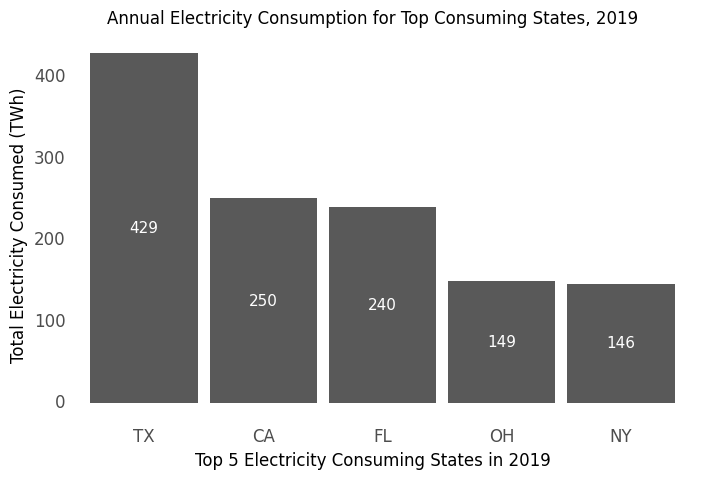

<ggplot: (8744701195225)>

In [ ]:
plotnine.options.figure_size = (8, 5)

p= (
    ggplot(df_top_5_19, aes(x='State', y='Total_TWh', label='tot_labels')) # labels argument puts data labels on bars 
      + geom_bar(stat='identity') # arranges aes() maps into bar geometry
      + geom_text(position=position_stack(vjust=.5), color='white') # adjusts the positioning and color of the data labels
      + scale_x_discrete(limits=state_list) # orders the categorical data in the order of the list: 'state_list'
      + xlab("Top 5 Electricity Consuming States in 2019") # adds x axis label
      + ylab("Total Electricity Consumed (TWh)") # adds y axis label
      + ggtitle("Annual Electricity Consumption for Top Consuming States, 2019") # adds chart title
      + theme_classic() # predefined 'look and feel' format. theme_classic() is very simple. See for more: https://plotnine.readthedocs.io/en/stable/api.html#themes
      + theme(axis_line=element_line(color="white"), # further adjusts theme_classic() - axis line white 
              axis_ticks=element_line(color = "white"), # further adjusts theme_classic() - axis ticks white
              text=element_text(size = 12)) # further adjusts theme_classic() - sets font size for whole chart
  ) 

p

### Standard Bar Chart with Error Bars

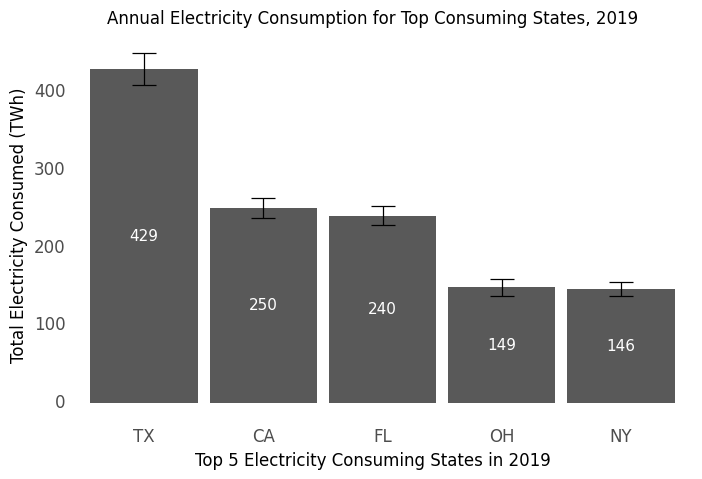

<ggplot: (8783520811793)>

In [ ]:
plotnine.options.figure_size = (8, 5)

p= (
    ggplot(df_top_5_19, aes(x='State', y='Total_TWh', label='tot_labels')) # labels argument puts data labels on bars 
      + geom_bar(stat='identity') # arranges aes() maps into bar geometry
      + geom_errorbar(aes(ymin="Total_TWh-error", ymax='Total_TWh+error'), width=.2, position=position_dodge(.9)) # ads error bars 
      + geom_text(position=position_stack(vjust=.5), color='white') # adjusts the positioning and color of the data labels
      + scale_x_discrete(limits=state_list) # orders the categorical data in the order of the list: 'state_list'
      + xlab("Top 5 Electricity Consuming States in 2019") # adds x axis label
      + ylab("Total Electricity Consumed (TWh)") # adds y axis label
      + ggtitle("Annual Electricity Consumption for Top Consuming States, 2019") # adds chart title
      + theme_classic() # predefined 'look and feel' format. theme_classic() is very simple. See for more: https://plotnine.readthedocs.io/en/stable/api.html#themes
      + theme(axis_line=element_line(color="white"), # further adjusts theme_classic() - axis line white 
              axis_ticks=element_line(color = "white"), # further adjusts theme_classic() - axis ticks white
              text=element_text(size = 12)) # further adjusts theme_classic() - sets font size for whole chart
  ) 

p

### Stacked Bar Chart

In [ ]:
# Melt long
df_top_5_19_long = pd.melt(df_top_5_19, id_vars=['State'], 
                           value_vars=['Residential_TWh', 'Commercial_TWh', 'Industrial_TWh', 'Transportation_TWh'],
                           var_name='Use_Type')
df_top_5_19_long.head()

,State,Use_Type,value
0,TX,Residential_TWh,155.481342
1,CA,Residential_TWh,87.523987
2,FL,Residential_TWh,127.181551
3,OH,Residential_TWh,52.226097
4,NY,Residential_TWh,50.141003


In [ ]:
df_top_5_19_long['Use_Type_label'] = df_top_5_19_long.Use_Type.str.replace("_TWh", "")
df_top_5_19_long.head()

,State,Use_Type,value,Use_Type_label
0,TX,Residential_TWh,155.481342,Residential
1,CA,Residential_TWh,87.523987,Residential
2,FL,Residential_TWh,127.181551,Residential
3,OH,Residential_TWh,52.226097,Residential
4,NY,Residential_TWh,50.141003,Residential


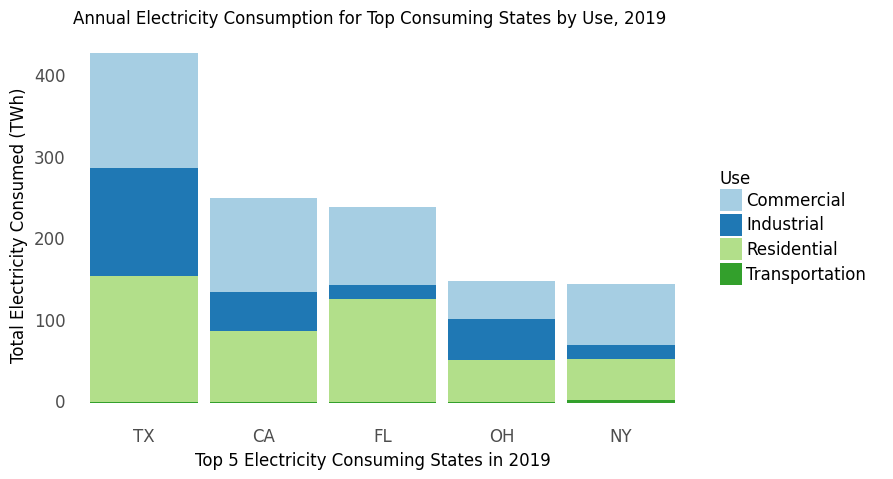

<ggplot: (8744701048277)>

In [ ]:
plotnine.options.figure_size = (8, 5)

p = (
    ggplot(df_top_5_19_long, aes(x='State', y='value', fill='Use_Type_label')) # fill colors the bar segments by 'Use_Type'
      + geom_bar(stat='identity') # arranges aes() maps into bar geometry
      + scale_x_discrete(limits=state_list) # orders the x axis categories according to the order in state_list
      + xlab("Top 5 Electricity Consuming States in 2019") # adds x axis label
      + ylab("Total Electricity Consumed (TWh)") # adds y axis label
      + labs(fill='Use') # renames the fill variable as "Use", thereby adjusting the legend title
      + ggtitle("Annual Electricity Consumption for Top Consuming States by Use, 2019 ") # adds chart title
      + theme_classic() # predefined 'look and feel' format. theme_classic() is very simple. See for more: https://plotnine.readthedocs.io/en/stable/api.html#themes
      + theme(axis_line=element_line(color="white"), # further adjusts theme_classic() - axis line white 
              axis_ticks=element_line(color = "white"), # further adjusts theme_classic() - axis ticks white
              text=element_text(size = 12)) # further adjusts theme_classic() - sets font size for whole chart
      + scale_fill_brewer(type="qual", palette="Paired") # sets color pallete for fill to predefinied "Paired" pallete. See more palettes at color brewer: https://colorbrewer2.org/#type=qualitative&scheme=Paired&n=3
                          
 ) 

p


### Clustered Bar Chart

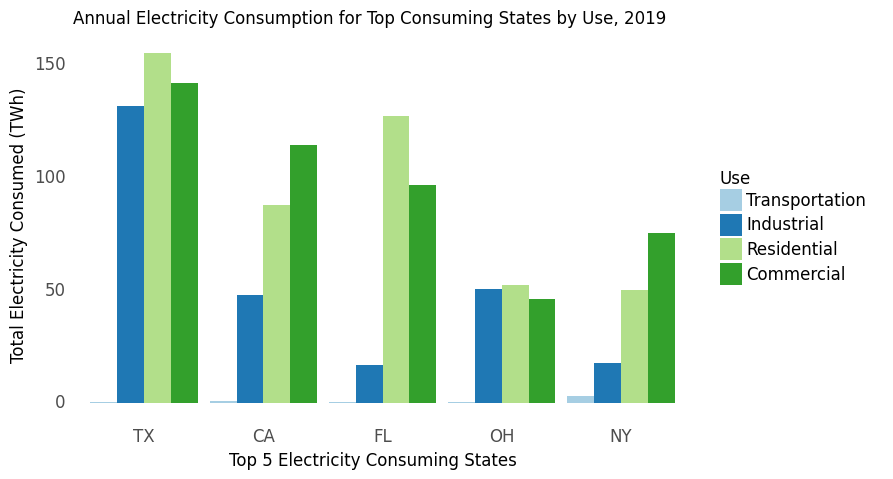

<ggplot: (8744691356697)>

In [ ]:
plotnine.options.figure_size = (8, 5)

p= (
    ggplot(df_top_5_19_long) # fill colors the bar segments by 'Use_Type', but we reorder the order of the clustered bars based on the 'values' column
      + geom_bar(stat='identity', mapping = aes(x='State', y='value', fill='reorder(Use_Type_label, value)'), position='dodge') # dodge position offsets the bars horizontally vs. stacking vertically
      + scale_x_discrete(limits=state_list) # orders the x axis categories according to the order in state_list
      + xlab("Top 5 Electricity Consuming States") # adds x axis label
      + ylab("Total Electricity Consumed (TWh)") # adds y axis label
      + labs(fill='Use') # renames the fill variable as "Use", thereby adjusting the legend title
      + ggtitle("Annual Electricity Consumption for Top Consuming States by Use, 2019 ") # adds chart title
      + theme_classic() # predefined 'look and feel' format. theme_classic() is very simple. See for more: https://plotnine.readthedocs.io/en/stable/api.html#themes
      + theme(axis_line=element_line(color="white"), # further adjusts theme_classic() - axis line white 
              axis_ticks=element_line(color = "white"), # further adjusts theme_classic() - axis ticks white
              text=element_text(size = 12)) # further adjusts theme_classic() - sets font size for whole chart
      + scale_fill_brewer(type="qual", palette="Paired") # sets color pallete for fill to predefinied "Paired" pallete. See more palettes at color brewer: https://colorbrewer2.org/#type=qualitative&scheme=Paired&n=3
                          
 ) 

p


In [ ]:
# Check reordering
df_top_5_19_long.groupby('Use_Type').sum().reset_index().sort_values('value')

,Use_Type,value
3,Transportation_TWh,3.897400
1,Industrial_TWh,263.793768
2,Residential_TWh,472.553980
0,Commercial_TWh,473.947186


### 100% Stacked Bar Chart

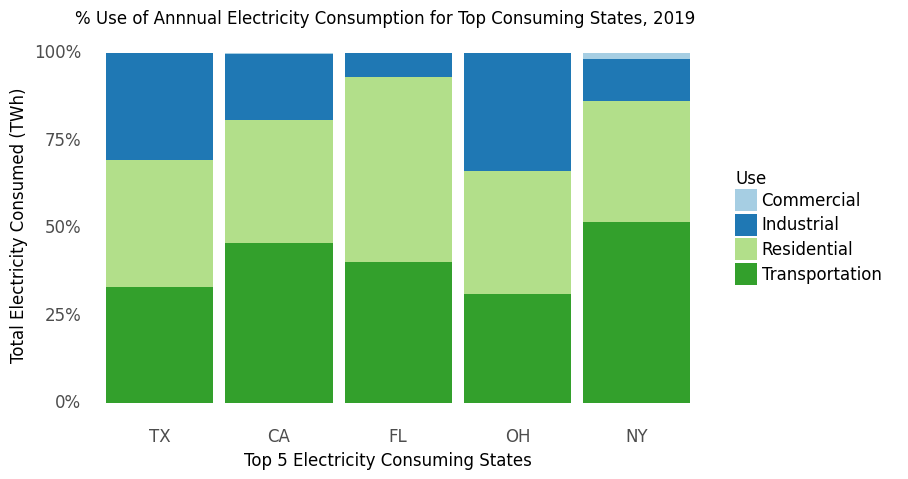

<ggplot: (8783520644333)>

In [ ]:
plotnine.options.figure_size = (8, 5)

p= (
    ggplot(df_top_5_19_long, aes(x='State', y='value', fill='reorder(Use_Type, value)'))  # fill colors the bar segments by 'Use_Type', but we reorder the order of the clustered bars based on the 'values' column
      + geom_bar(stat='identity', position='fill') # fill position specifies 100% stacked bar (as in 'fill the entire space' not fill the aesthetic)
      + scale_y_continuous(labels=percent_format()) # formats the y axis labels (y axis is continuous) "percent_format()" is a predefined function that we imported above
      + scale_x_discrete(limits=state_list) # orders the x axis categories according to the order in state_list
      + xlab("Top 5 Electricity Consuming States") # adds x axis label
      + ylab("Total Electricity Consumed (TWh)") # adds y axis label
      + labs(fill='Use') # renames the fill variable as "Use", thereby adjusting the legend title
      + ggtitle("% Use of Annnual Electricity Consumption for Top Consuming States, 2019 ") # adds chart title
      + theme_classic() # predefined 'look and feel' format. theme_classic() is very simple. See for more: https://plotnine.readthedocs.io/en/stable/api.html#themes
      + theme(axis_line=element_line(color="white"), # further adjusts theme_classic() - axis line white 
              axis_ticks=element_line(color = "white"), # further adjusts theme_classic() - axis ticks white
              text=element_text(size = 12)) # further adjusts theme_classic() - sets font size for whole chart
      + scale_fill_brewer(type="qual", palette="Paired",  # sets color pallete for fill to predefinied "Paired" pallete. See more palettes at color brewer: https://colorbrewer2.org/#type=qualitative&scheme=Paired&n=3
                          labels=['Commercial', 'Industrial', 'Residential', 'Transportation']) # adjusts labels for fill values
 ) 

p


### Bar Chart with Small Multiples

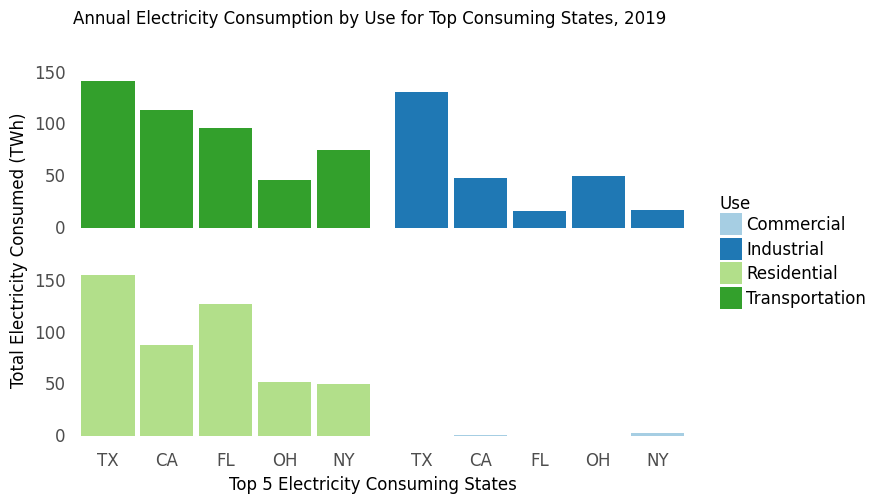

<ggplot: (8783520643309)>

In [ ]:
plotnine.options.figure_size = (8, 5)

p= (
    ggplot(df_top_5_19_long, aes(x='State', y='value', fill='reorder(Use_Type, value)'))  # fill colors the bar segments by 'Use_Type', but we reorder the order of the clustered bars based on the 'values' column
      + geom_bar(stat='identity') # no position argument
      + facet_wrap(facets='Use_Type') # facet with the 'Use_Type' column - make small mini charts for each 'Use_Type'
      + scale_x_discrete(limits=state_list) # orders the x axis categories according to the order in state_list
      + xlab("Top 5 Electricity Consuming States") # adds x axis label
      + ylab("Total Electricity Consumed (TWh)") # adds y axis label
      + labs(fill='Use') # renames the fill variable as "Use", thereby adjusting the legend title
      + ggtitle("Annual Electricity Consumption by Use for Top Consuming States, 2019 ") #adds chart title
      + theme_classic() # predefined 'look and feel' format. theme_classic() is very simple. See for more: https://plotnine.readthedocs.io/en/stable/api.html#themes
      + theme(axis_line=element_line(color="white"), # further adjusts theme_classic() - axis line white 
              axis_ticks=element_line(color = "white"), # further adjusts theme_classic() - axis ticks white 
              text=element_text(size = 12), # further adjusts theme_classic() - sets font size for whole chart
              rect=element_line(color = "white"), # further adjusts theme_classic() - rectangle boxes around facet headers white 
              strip_text=element_line(color = "white"), # further adjusts theme_classic() - facet headers text white 
              legend_position="right") # puts legend on right of chart
      + scale_fill_brewer(type="qual", palette="Paired", # sets color pallete for fill to predefinied "Paired" pallete. See more palettes at color brewer: https://colorbrewer2.org/#type=qualitative&scheme=Paired&n=3
                          labels=['Commercial', 'Industrial', 'Residential', 'Transportation'])# adjusts labels for fill values
 ) 

p


## Line Charts

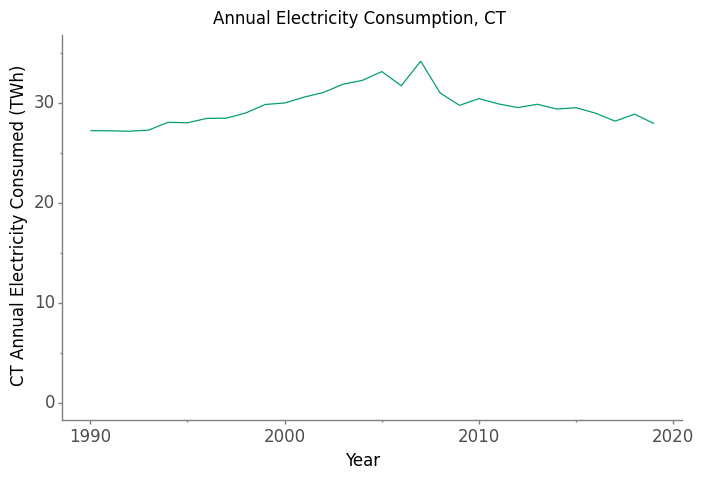

<ggplot: (8744701179969)>

In [ ]:
plotnine.options.figure_size = (8, 5)
(
  ggplot(df_tot[df_tot.State=='CT']) # dataframe with filtering
    + geom_line(aes(x='Year', y='Total_TWh'), color='#009E73') # sets aes() in geom_line rather than ggplot(). Sets color manually with hex code
    + scale_y_continuous(limits=[0, 35]) # sets limits of y axis
    # + scale_x_discrete(limits=[1990, 1991,2020]) # sets limits of x axis
    + xlab("Year") # adds x axis label
    + ylab("CT Annual Electricity Consumed (TWh)") # adds y axis label
    + ggtitle("Annual Electricity Consumption, CT ") # adds title
    + theme_classic() # predefined 'look and feel' format. theme_classic() is very simple. See for more: https://plotnine.readthedocs.io/en/stable/api.html#themes
    + theme(axis_line=element_line(color="gray"), # further adjusts theme_classic() - axis line gray 
            axis_ticks=element_line(color = "gray"), # further adjusts theme_classic() - axis ticks gray
            text=element_text(size = 12)) # sets font size for whole chart
)

## Scatter Charts

### Standard Scatter Plot

In [ ]:
# Bucket Year categories
df_tot_no_us['Year_cat'] = np.where(df_tot_no_us.Year<1995,"1990-1994",
                                    np.where(df_tot_no_us.Year<2000, "1995-1999",
                                    np.where(df_tot_no_us.Year<2005, "2000-2004",
                                    np.where(df_tot_no_us.Year<2010, "2005-2009",
                                    np.where(df_tot_no_us.Year<2015, "2010-2014",
                                    np.where(df_tot_no_us.Year<2020, "2015-2019", ""))))))

df_tot_no_us.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Year,State,Industry Sector Category,Residential,Commercial,Industrial,Transportation,Other,Total,Residential_TWh,Commercial_TWh,Industrial_TWh,Transportation_TWh,Other_TWh,Total_TWh,Year_cat
0,2019,AK,Total Electric Industry,1928208,2638846,1251751,0.0,NaN,5818805,1.928208,2.638846,1.251751,0.000000,NaN,5.818805,2015-2019
1,2019,AL,Total Electric Industry,32415646,23076470,32602996,0.0,NaN,88095112,32.415646,23.076470,32.602996,0.000000,NaN,88.095112,2015-2019
2,2019,AR,Total Electric Industry,18732316,11948689,17411611,416.0,NaN,48093032,18.732316,11.948689,17.411611,0.000416,NaN,48.093032,2015-2019
3,2019,AZ,Total Electric Industry,34720050,29415272,13782704,11144.0,NaN,77929170,34.720050,29.415272,13.782704,0.011144,NaN,77.929170,2015-2019
4,2019,CA,Total Electric Industry,87523987,114279373,47807729,767621.0,NaN,250378710,87.523987,114.279373,47.807729,0.767621,NaN,250.378710,2015-2019


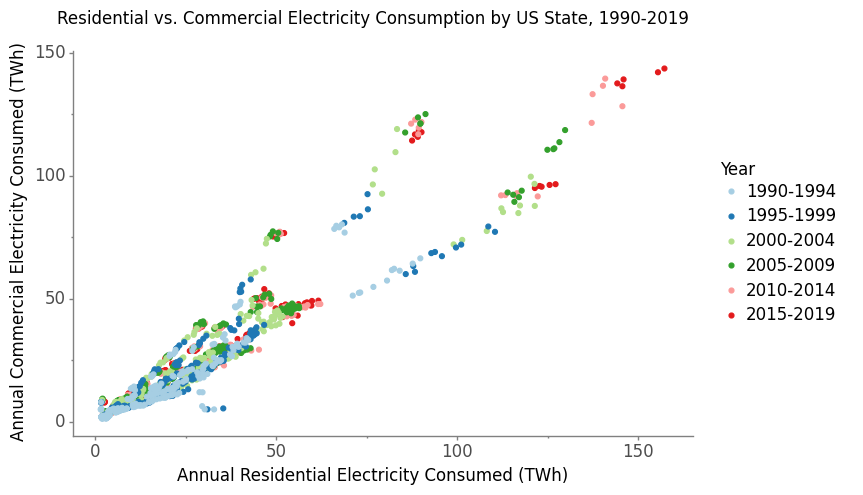

<ggplot: (8783520794061)>

In [ ]:
plotnine.options.figure_size = (8, 5)

(
  ggplot(df_tot_no_us) # only dataframe in ggplot() - aes() can optionally go in geom_
    + geom_point(aes(x='Residential_TWh', y='Commercial_TWh', color='Year_cat')) # aes() defined in geom - this is ok too! Color arg in aes() will use variable to color points
    + xlab("Annual Residential Electricity Consumed (TWh)") # adds x axis label
    + ylab("Annual Commercial Electricity Consumed (TWh)") # adds y axis label
    + labs(color='Year') # renames the color variable as "Year", thereby adjusting the legend title
    + ggtitle("Residential vs. Commercial Electricity Consumption by US State, 1990-2019\n") # adds chart title. The "\n" adds a new line after the title text to give some space above the axis (a bit hacky)
    + theme_classic() # predefined 'look and feel' format. theme_classic() is very simple. See for more: https://plotnine.readthedocs.io/en/stable/api.html#themes
    + theme(axis_line=element_line(color="gray"), # further adjusts theme_classic() - axis line gray 
            axis_ticks=element_line(color = "gray"), # further adjusts theme_classic() - axis ticks gray
            text=element_text(size = 12), # sets font size for whole chart
            legend_position="right") # sets legend on rigth hand side
    + scale_color_brewer(type="qual", palette="Paired") # sets color pallete for fill to predefinied "Paired" pallete.See more palettes at color brewer: https://colorbrewer2.org/#type=qualitative&scheme=Paired&n=3
)

### Bubble Scatter Plot

/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


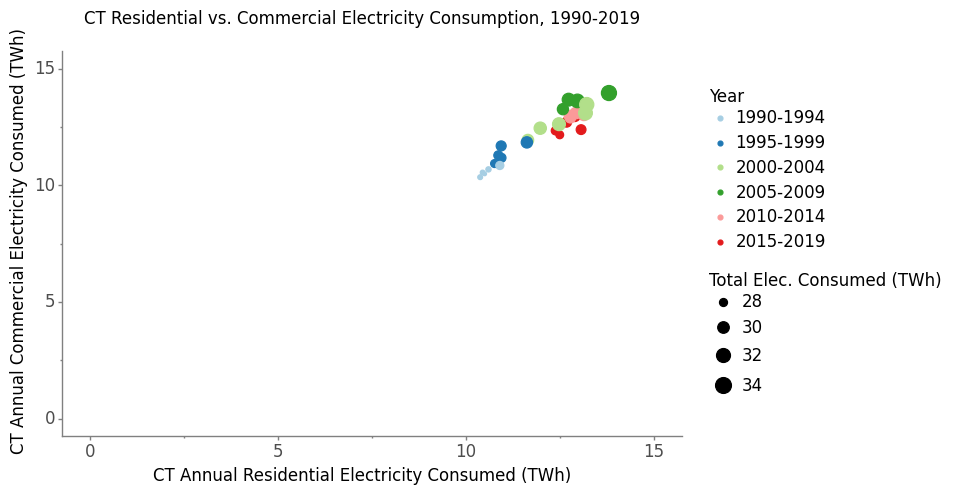

<ggplot: (8783520781629)>

In [ ]:
plotnine.options.figure_size = (8, 5)

(
  ggplot(df_tot_no_us[df_tot_no_us.State == 'CT'])# only filtered dataframe in ggplot() - aes() can optionally go in geom_
    + geom_point(aes(x='Residential_TWh', y='Commercial_TWh', color='Year_cat', size='Total_TWh')) # aes() defined in geom - this is ok too! Color arg in aes() will use variable to color points, size arge will use variable to size bubbles
    + scale_y_continuous(limits=[0,15]) # set y axis limits (y is continuous)
    + scale_x_continuous(limits=[0,15]) # set x axis limits (x is continuous)
    + xlab("CT Annual Residential Electricity Consumed (TWh)") # set x axis label
    + ylab("CT Annual Commercial Electricity Consumed (TWh)") # set y axis label
    + labs(color='Year', size='Total Elec. Consumed (TWh)') # renames the color and size variables, thereby adjusting the legend titles
    + ggtitle("CT Residential vs. Commercial Electricity Consumption, 1990-2019\n") # adds chart title. The "\n" adds a new line after the title text to give some space above the axis (a bit hacky)
    + theme_classic() # predefined 'look and feel' format. theme_classic() is very simple. See for more: https://plotnine.readthedocs.io/en/stable/api.html#themes
    + theme(axis_line=element_line(color="gray"), # further adjusts theme_classic() - axis line gray 
            axis_ticks=element_line(color = "gray"), # further adjusts theme_classic() - axis ticks gray
            text=element_text(size = 12), # sets font size for whole chart
            legend_position="right") # sets legend on rigth hand side
    + scale_color_brewer(type="qual", palette="Paired") # sets color pallete for fill to predefinied "Paired" pallete.See more palettes at color brewer: https://colorbrewer2.org/#type=qualitative&scheme=Paired&n=3
)

### Standard Scatter Plot with Best Fit Line

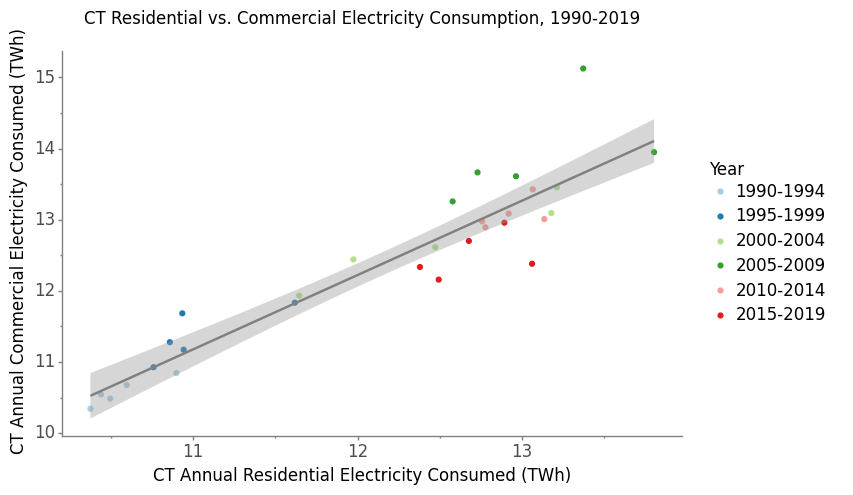

<ggplot: (8783520686281)>

In [ ]:
plotnine.options.figure_size = (8, 5)

(
  ggplot(df_tot_no_us[df_tot_no_us.State == 'CT'], # filtered df
         aes(x='Residential_TWh', y='Commercial_TWh', color='Year_cat')) # aes() in ggplot() will be used for both geoms. Otherwise, we'd have to add aes() arg to geom_point() and geom_smooth()
    + geom_point() # create scatter
    + geom_smooth(method='lm', color='gray') # geom_smooth() adds best fit line. method='lm' uses a linear model to fit (polynomial as an option). Color arg sets the error bound color
    + xlab("CT Annual Residential Electricity Consumed (TWh)") # add x axis title
    + ylab("CT Annual Commercial Electricity Consumed (TWh)") # add y axis title
    + labs(color='Year', size='Total Elec. Consumed (TWh)') # renames the color and size variables, thereby adjusting the legend titles
    + ggtitle("CT Residential vs. Commercial Electricity Consumption, 1990-2019\n")
    + theme_classic() # predefined 'look and feel' format. theme_classic() is very simple. See for more: https://plotnine.readthedocs.io/en/stable/api.html#themes
    + theme(axis_line=element_line(color="gray"), # further adjusts theme_classic() - axis line gray 
            axis_ticks=element_line(color = "gray"), # further adjusts theme_classic() - axis ticks gray
            text=element_text(size = 12), # sets font size for whole chart
            legend_position="right") # sets legend on rigth hand side
    + scale_color_brewer(type="qual", palette="Paired") # sets color pallete for fill to predefinied "Paired" pallete.See more palettes at color brewer: https://colorbrewer2.org/#type=qualitative&scheme=Paired&n=3
)


## Tables

In [ ]:
# Calculate Correlation 'Matrix'
use_corr = df_tot_no_us[['Residential', 'Commercial', 'Industrial', 'Transportation']].corr().reset_index()

# Melt Long for Chart
use_corr_long = pd.melt(use_corr, id_vars='index' )
use_corr_long.head()

,index,variable,value
0,Residential,Residential,1.000000
1,Commercial,Residential,0.946944
2,Industrial,Residential,0.774471
3,Transportation,Residential,0.268786
4,Residential,Commercial,0.946944


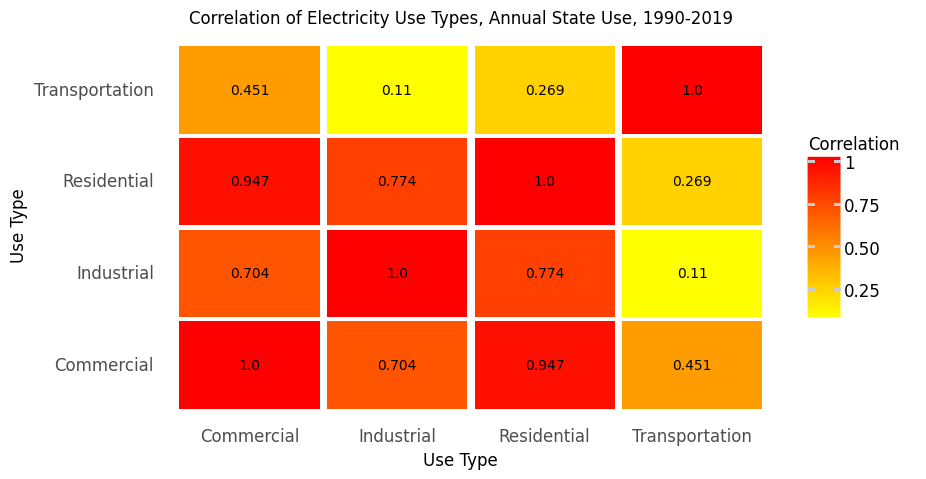

<ggplot: (8783509073809)>

In [ ]:

(
    ggplot(use_corr_long, # df is long correlation table
           aes(x='index', y='variable', fill='value')) # aes() just like other plots with x, y and fill variable assignment. aes() used in both geom_tile() and geom_text()
      + geom_tile(aes(width=.95, height=.95)) # width and height args in aes() create the 5% margins around the tiles. Arguments go in aes() despite not being variables...
      + geom_text(aes(label='round(value, 3)'), size=10) # places text at  x and y values. Here, we're using the 'value' column as the text, but we're rounding in the aes assignment. Otherwise, could create new, rounded column
      + xlab("Use Type") # add x axis label
      + ylab("Use Type")# add y axis label
      + labs(fill='Correlation') # renames the fill variable, thereby adjusting the legend title
      + ggtitle("Correlation of Electricity Use Types, Annual State Use, 1990-2019") # add chart title
    + theme_classic() # predefined 'look and feel' format. theme_classic() is very simple. See for more: https://plotnine.readthedocs.io/en/stable/api.html#themes
    + theme(axis_line=element_line(color="white"), # further adjusts theme_classic() - axis line white 
            axis_ticks=element_line(color = "white"), # further adjusts theme_classic() - axis ticks white
            text=element_text(size = 12), # sets font size for whole chart
            legend_position="right") # sets legend on rigth hand side
      + scale_fill_gradient(low="yellow",high="red") # further adjusts theme_classic() - manually set the scale of the fill
)
